<h2> step 1 IMPORT THE DATA SET AND NECESSARY LIBRARIES </h2>

In [1]:
# Import the dataset
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
file_path = 'drugsCom_raw.tsv'
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')

[nltk_data] Downloading package punkt to C:\Users\LOCHAN
[nltk_data]     RISHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


<h2> finding the shape of the data </h2>

In [3]:
df.shape

(161297, 7)

<h2> Getting information about the variables and missing values </h2>

In [4]:
##Get information about the data types and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


<h3> MISSING VALUES IDENTIFICATION </H3>

In [6]:

#nunique() based on several unique values in each column and the data description,
#we can identify the continuous and categorical columns in the data. 

#Duplicated data can be handled or removed based on further analysis

df.nunique()

Unnamed: 0     161297
drugName         3436
condition         884
review         112329
rating             10
date             3579
usefulCount       389
dtype: int64

<H3> Summary statistics for numerical features </H3>

In [7]:
#Summary statistics for numerical features

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


<H2>  step 2 SPLIT/FILTERING DATA BASED ON CONDITIONS </H2>

In [9]:
# Filter for the conditions we're interested in
conditions_of_interest = ["Depression", "High Blood Pressure", "Diabetes, Type 2"]
filtered_data = df[df['condition'].isin(conditions_of_interest)].copy()
filtered_data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [10]:
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(filtered_data.isnull().sum())


Missing Values in Each Column:
Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


<H3> DISTRIBUTION OF CONDITIONS BASED ON REVIEWS </H3>

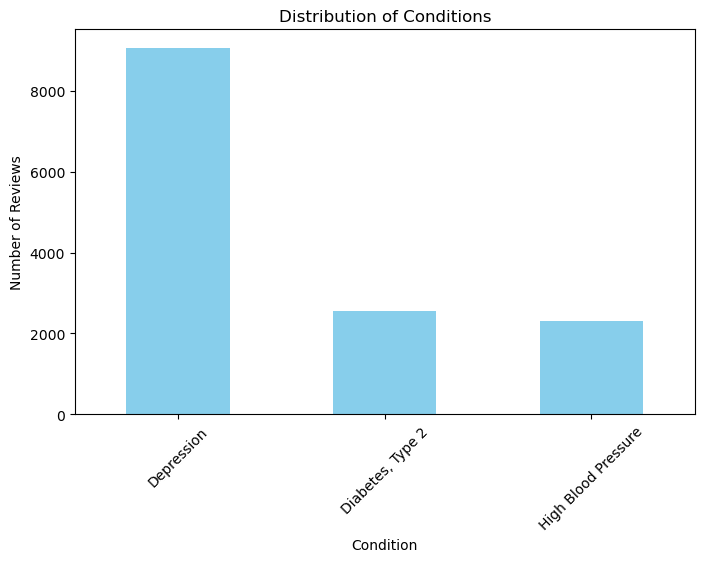

In [11]:
# Distribution of Conditions
condition_counts = filtered_data['condition'].value_counts()
plt.figure(figsize=(8, 5))
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

<h3> DISTRIBUTION OF REVIEW_LENGTHS </H3>

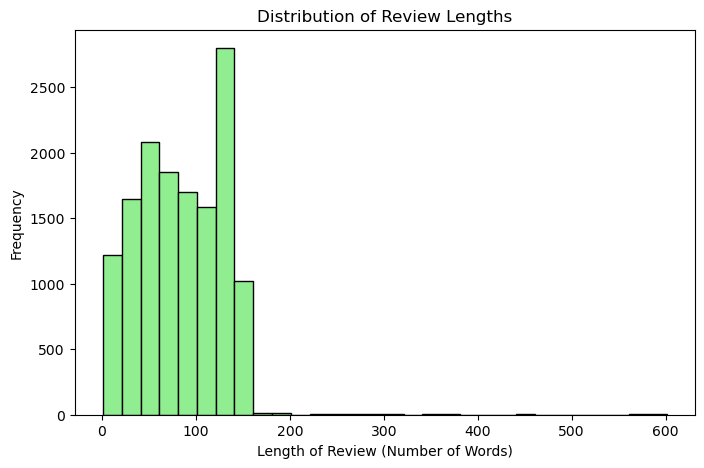

In [12]:
# Length of Reviews
filtered_data['review_length'] = filtered_data['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
plt.hist(filtered_data['review_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review (Number of Words)')
plt.ylabel('Frequency')
plt.show()

<H1> STEP 3 TEXT-PRE-PROCESSING TECHNIQUES </H1>

<H2> STEP 3 (a) Tokenization </h2>

In [13]:
# Convert all words in reviews to lowercase and tokenize
from nltk.tokenize import word_tokenize
filtered_data['tokenized_review'] = filtered_data['review'].apply(lambda x: [word.lower() for word in word_tokenize(x)])
filtered_data['tokenized_review']

11        [``, i, have, taken, anti-depressants, for, ye...
31        [``, 1, week, on, zoloft, for, anxiety, and, m...
44        [``, my, gp, started, me, on, venlafaxine, yes...
50        [``, hey, guys, ,, it, &, #, 039, ;, s, been, ...
67        [``, this, medicine, saved, my, life, ., i, wa...
                                ...                        
161251    [``, it, is, fourth, blood, pressure, pill, fo...
161258    [``, while, on, bystolic, my, feet, and, arms,...
161278    [``, i, just, got, diagnosed, with, type, 2, ....
161286    [``, this, is, the, third, med, i, &, #, 039, ...
161290    [``, i, have, only, been, on, tekturna, for, 9...
Name: tokenized_review, Length: 13944, dtype: object

In [14]:
#SENTIMENT ANALYSIS 

In [15]:
# Sentiment Analysis 
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
filtered_data['sentiment'] = filtered_data['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

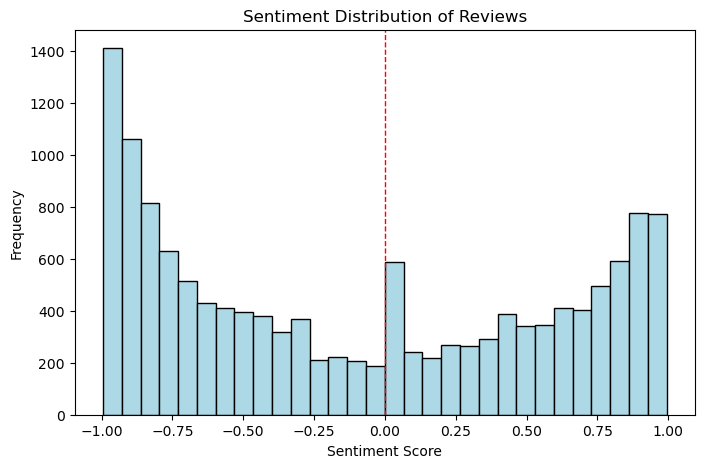

In [16]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(filtered_data['sentiment'], bins=30, color='lightblue', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

<h2> STEP 3 (b) Removing Stop_words </h2>

In [17]:
# Remove stopwords
stopwords_list = set(stopwords.words('english'))
filtered_data['filtered_review'] = filtered_data['tokenized_review'].apply(lambda x: [word for word in x if word not in stopwords_list])
filtered_data['filtered_review']

11        [``, taken, anti-depressants, years, ,, improv...
31        [``, 1, week, zoloft, anxiety, mood, swings, ....
44        [``, gp, started, venlafaxine, yesterday, help...
50        [``, hey, guys, ,, &, #, 039, ;, 4, months, si...
67        [``, medicine, saved, life, ., wits, end, anti...
                                ...                        
161251    [``, fourth, blood, pressure, pill, ., feels, ...
161258    [``, bystolic, feet, arms, numb, ., blood, sug...
161278    [``, got, diagnosed, type, 2, ., doctor, presc...
161286    [``, third, med, &, #, 039, ;, tried, anxiety,...
161290    [``, tekturna, 9, days, ., effect, immediate, ...
Name: filtered_review, Length: 13944, dtype: object

<H2> STEP 3 (C) Removing Punctuations </H2>

In [18]:
# Remove punctuation
punctuations = '''!()-[]{};:'"\,<>.''/?@#$%^&*_~``....'''
filtered_data['no_punctuation_review'] = filtered_data['filtered_review'].apply(lambda x: [word for word in x if word not in punctuations])
filtered_data['no_punctuation_review'] 

<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\,'
C:\Users\LOCHAN RISHITHA\AppData\Local\Temp\ipykernel_23472\1769161038.py:2: SyntaxWarning: invalid escape sequence '\,'
  punctuations = '''!()-[]{};:'"\,<>.''/?@#$%^&*_~``....'''


11        [taken, anti-depressants, years, improvement, ...
31        [1, week, zoloft, anxiety, mood, swings, take,...
44        [gp, started, venlafaxine, yesterday, help, de...
50        [hey, guys, 039, 4, months, since, last, post,...
67        [medicine, saved, life, wits, end, anti-depres...
                                ...                        
161251    [fourth, blood, pressure, pill, feels, like, p...
161258    [bystolic, feet, arms, numb, blood, sugars, be...
161278    [got, diagnosed, type, 2, doctor, prescribed, ...
161286    [third, med, 039, tried, anxiety, mild, depres...
161290    [tekturna, 9, days, effect, immediate, also, c...
Name: no_punctuation_review, Length: 13944, dtype: object

<h2> STEP 3 (D) STEMMING </H2>

In [19]:
# Apply stemming
porter_stemmer = PorterStemmer()
filtered_data['stemmed_review'] = filtered_data['no_punctuation_review'].apply(lambda x: [porter_stemmer.stem(word) for word in x])
filtered_data['stemmed_review']

11        [taken, anti-depress, year, improv, mostli, mo...
31        [1, week, zoloft, anxieti, mood, swing, take, ...
44        [gp, start, venlafaxin, yesterday, help, depre...
50        [hey, guy, 039, 4, month, sinc, last, post, wa...
67        [medicin, save, life, wit, end, anti-depress, ...
                                ...                        
161251    [fourth, blood, pressur, pill, feel, like, par...
161258    [bystol, feet, arm, numb, blood, sugar, becam,...
161278    [got, diagnos, type, 2, doctor, prescrib, invo...
161286    [third, med, 039, tri, anxieti, mild, depress,...
161290    [tekturna, 9, day, effect, immedi, also, calci...
Name: stemmed_review, Length: 13944, dtype: object

In [20]:
# Flatten all stemmed words across reviews into a single list
all_words = [word for tokens in filtered_data['stemmed_review'] for word in tokens]
all_words

['taken',
 'anti-depress',
 'year',
 'improv',
 'mostli',
 'moder',
 'sever',
 'side',
 'affect',
 'make',
 'go',
 'take',
 'cymbalta',
 'mostli',
 'pain',
 'began',
 'deplin',
 'notic',
 'major',
 'improv',
 'overnight',
 'energi',
 'better',
 'disposit',
 'sink',
 'low',
 'low',
 'major',
 'depress',
 'take',
 '3',
 'month',
 'feel',
 'like',
 'normal',
 'person',
 'first',
 'time',
 'ever',
 'best',
 'thing',
 'side',
 'effect',
 '1',
 'week',
 'zoloft',
 'anxieti',
 'mood',
 'swing',
 'take',
 '50mg',
 'morn',
 'breakfast',
 'nausea',
 'day',
 'one',
 'subsid',
 'week',
 'went',
 'get',
 'jitter',
 '2',
 'hr',
 'take',
 'follow',
 'yawn',
 'feel',
 'much',
 'better',
 'though',
 'less',
 'angry/stress',
 'gp',
 'start',
 'venlafaxin',
 'yesterday',
 'help',
 'depress',
 'chang',
 'hour',
 'take',
 'feel',
 'sick',
 'stomach',
 'food',
 'fluid',
 'thought',
 'keep',
 'told',
 'come',
 'side',
 'effect',
 'would',
 'get',
 'better',
 'took',
 'anoth',
 'one',
 'last',
 'night',
 'ill

In [21]:
len(all_words)

604726

In [22]:
# Optionally, remove specific words from the word cloud
exclude_words = ["drug", "patient", "take", "feel", "use", "review","take", "taken", "feel", "effect", "help", "doctor", "med", "side", "make",
    "use", "see", "better", "first", "time", "day", "week", "month", "year", "dose",
    "one", "two", "also", "would", "could", "get", "got", "need", "start", "end",
    "told", "find", "go", "back", "thing", "time", "amp", "039", "quot","00","000","00am","00p","00pm","01","02","05","07","08"]  # Customize as needed
filtered_words = [word for word in all_words if word not in exclude_words]
filtered_words

['anti-depress',
 'improv',
 'mostli',
 'moder',
 'sever',
 'affect',
 'cymbalta',
 'mostli',
 'pain',
 'began',
 'deplin',
 'notic',
 'major',
 'improv',
 'overnight',
 'energi',
 'disposit',
 'sink',
 'low',
 'low',
 'major',
 'depress',
 '3',
 'like',
 'normal',
 'person',
 'ever',
 'best',
 '1',
 'zoloft',
 'anxieti',
 'mood',
 'swing',
 '50mg',
 'morn',
 'breakfast',
 'nausea',
 'subsid',
 'went',
 'jitter',
 '2',
 'hr',
 'follow',
 'yawn',
 'much',
 'though',
 'less',
 'angry/stress',
 'gp',
 'venlafaxin',
 'yesterday',
 'depress',
 'chang',
 'hour',
 'sick',
 'stomach',
 'food',
 'fluid',
 'thought',
 'keep',
 'come',
 'took',
 'anoth',
 'last',
 'night',
 'ill',
 'stand',
 'sick',
 'sweat',
 'shake',
 'thought',
 'pass',
 'sleep',
 'hope',
 'morn',
 'took',
 'anoth',
 'felt',
 'space',
 'dri',
 'mouth',
 'shake',
 'sick',
 'book',
 'gp',
 'sure',
 'like',
 'put',
 'wrong',
 '37.5mg',
 'put',
 '150mg',
 'right',
 'hope',
 'hey',
 'guy',
 '4',
 'sinc',
 'last',
 'post',
 'want',


In [23]:
len(filtered_words)

464202

<H1> STEP 4 EDA </H1>
<H2> STEP 4 A WORD CLOUD </H2>

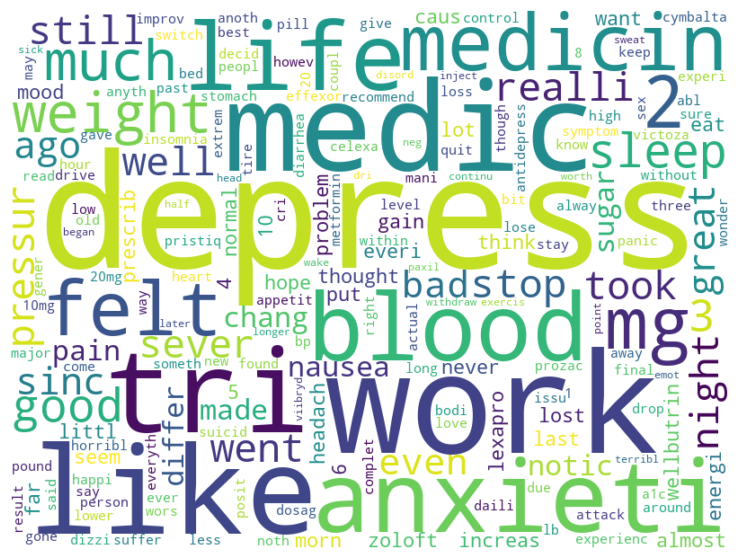

In [24]:
# Create a dictionary to store word frequency
word_counts = {}
for word in filtered_words:
    word_counts[word] = word_counts.get(word, 0) + 1


# Create and display the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
word_counts

{'anti-depress': 335,
 'improv': 881,
 'mostli': 144,
 'moder': 137,
 'sever': 2054,
 'affect': 412,
 'cymbalta': 860,
 'pain': 1574,
 'began': 511,
 'deplin': 151,
 'notic': 1584,
 'major': 679,
 'overnight': 36,
 'energi': 1102,
 'disposit': 5,
 'sink': 11,
 'low': 928,
 'depress': 7024,
 '3': 2239,
 'like': 4001,
 'normal': 1297,
 'person': 631,
 'ever': 898,
 'best': 776,
 '1': 821,
 'zoloft': 1276,
 'anxieti': 3543,
 'mood': 1254,
 'swing': 251,
 '50mg': 440,
 'morn': 1163,
 'breakfast': 89,
 'nausea': 1582,
 'subsid': 257,
 'went': 2124,
 'jitter': 21,
 '2': 2696,
 'hr': 90,
 'follow': 239,
 'yawn': 127,
 'much': 2515,
 'though': 648,
 'less': 881,
 'angry/stress': 1,
 'gp': 131,
 'venlafaxin': 108,
 'yesterday': 161,
 'chang': 1632,
 'hour': 1045,
 'sick': 543,
 'stomach': 842,
 'food': 465,
 'fluid': 77,
 'thought': 1556,
 'keep': 799,
 'come': 744,
 'took': 2077,
 'anoth': 650,
 'last': 1416,
 'night': 1913,
 'ill': 146,
 'stand': 174,
 'sweat': 543,
 'shake': 160,
 'pass': 24

In [26]:
len(word_counts)

13349

In [27]:
54+13349

13403

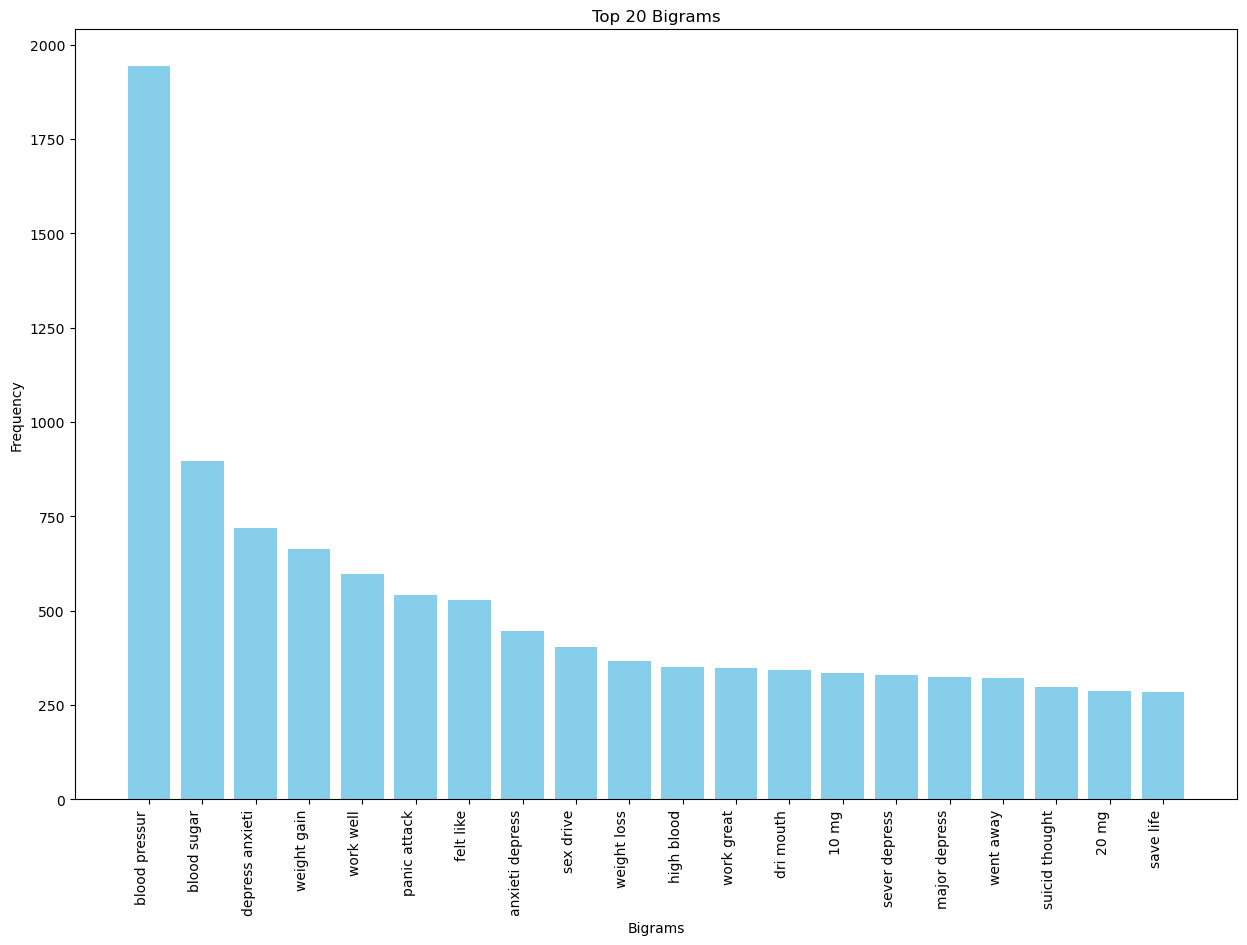

In [28]:
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Sample list of words after text processing (replace this with your processed words list)
# filtered_words = [word.lower() for word in some_text.split() if word.isalpha()]

# Function to get n-gram counts
def get_ngram_counts(words, n=2, top_n=20):
    ngrams_list = list(ngrams(words, n))
    ngram_counts = Counter(ngrams_list).most_common(top_n)
    return ngram_counts

# Bigram bar chart
bigrams = get_ngram_counts(filtered_words, n=2)
bigram_labels = [" ".join(ngram) for ngram, count in bigrams]
bigram_values = [count for ngram, count in bigrams]

plt.figure(figsize=(15, 10))
plt.bar(bigram_labels, bigram_values, color="skyblue")
plt.title("Top 20 Bigrams")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.show()

<h2> STEP 4  BI-GRAMS </H2>

<h2> STEP 4 C TRI-GRAMS </H2>

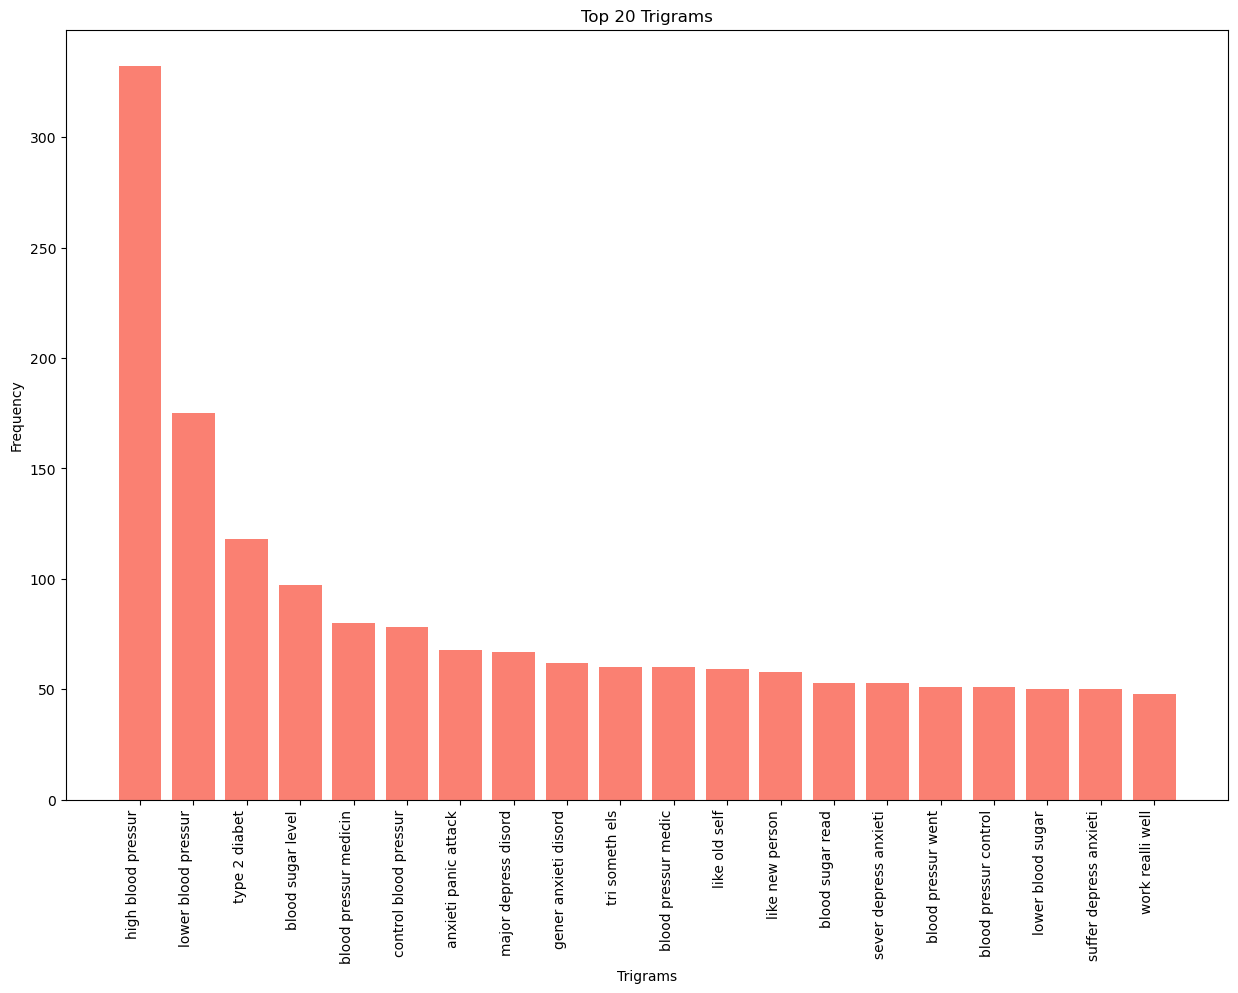

In [29]:
# Trigram bar chart
trigrams = get_ngram_counts(filtered_words, n=3)
trigram_labels = [" ".join(ngram) for ngram, count in trigrams]
trigram_values = [count for ngram, count in trigrams]

plt.figure(figsize=(15, 10))
plt.bar(trigram_labels, trigram_values, color="salmon")
plt.title("Top 20 Trigrams")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.show()

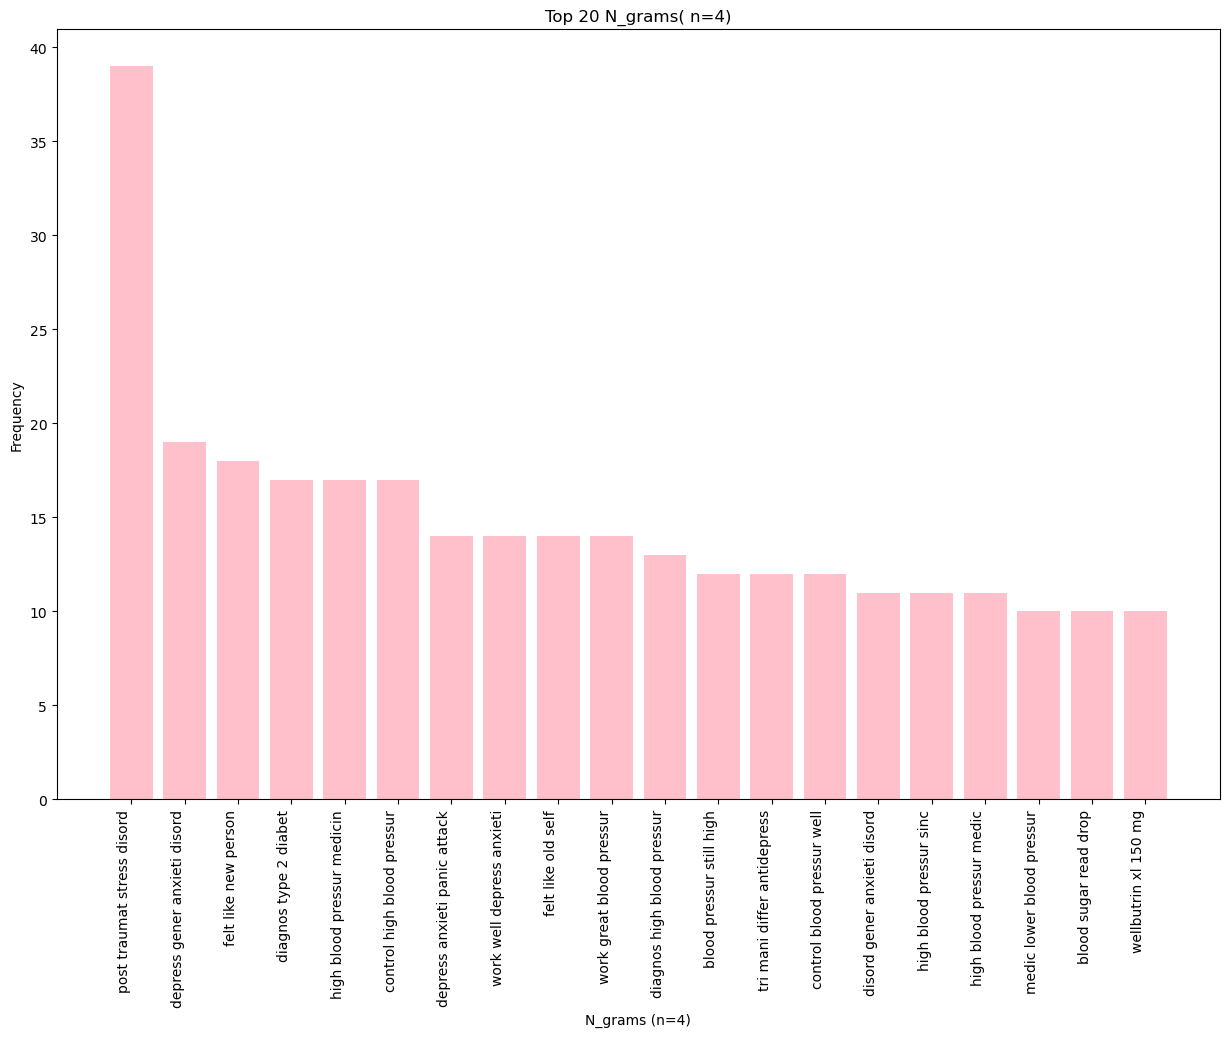

In [30]:
# n-gram(n=4) bar chart
trigrams = get_ngram_counts(filtered_words, n=4)
trigram_labels = [" ".join(ngram) for ngram, count in trigrams]
trigram_values = [count for ngram, count in trigrams]

plt.figure(figsize=(15, 10))
plt.bar(trigram_labels, trigram_values, color="pink")
plt.title("Top 20 N_grams( n=4)")
plt.xticks(rotation=90, ha="right")
plt.xlabel("N_grams (n=4)")
plt.ylabel("Frequency")
plt.show()

<h2> STEP 5 TF-IDF </H2>

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# Step 1: Applying TF-IDF on the 'cleaned_review' column
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_features = tfidf_vectorizer.fit_transform(word_counts)
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,00,10,100,102,105,106,11,110,112,115,...,pain,pre,re,self,sleep,so,to,up,year,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
(len(tfidf_vectorizer.vocabulary_))


100

<H1> SMOTE PROCESS OF RE-SAMPLING </H2>

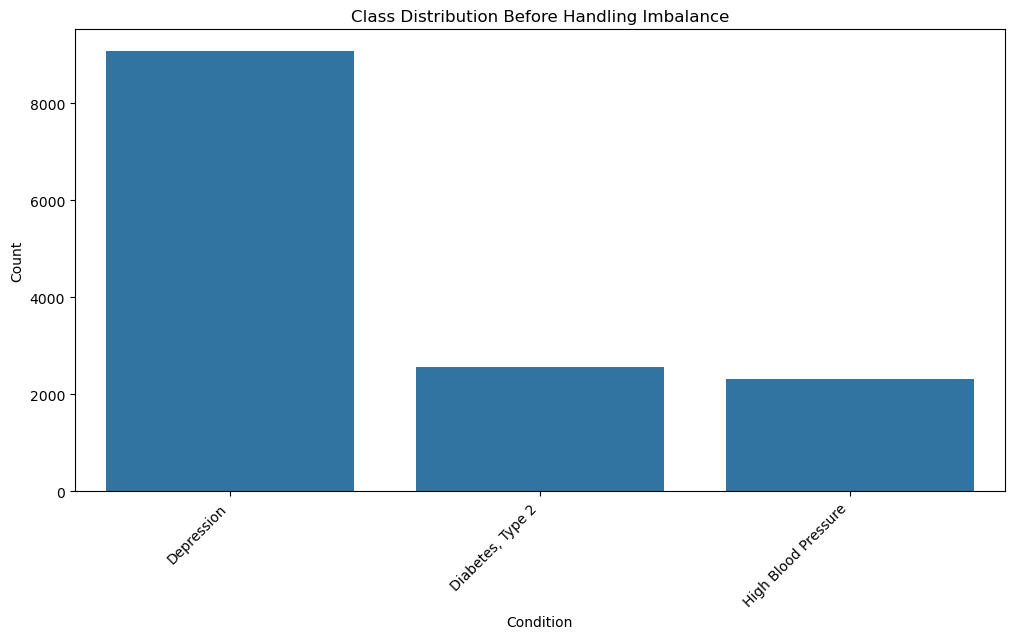

Class Distribution Before Handling Imbalance:
condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64


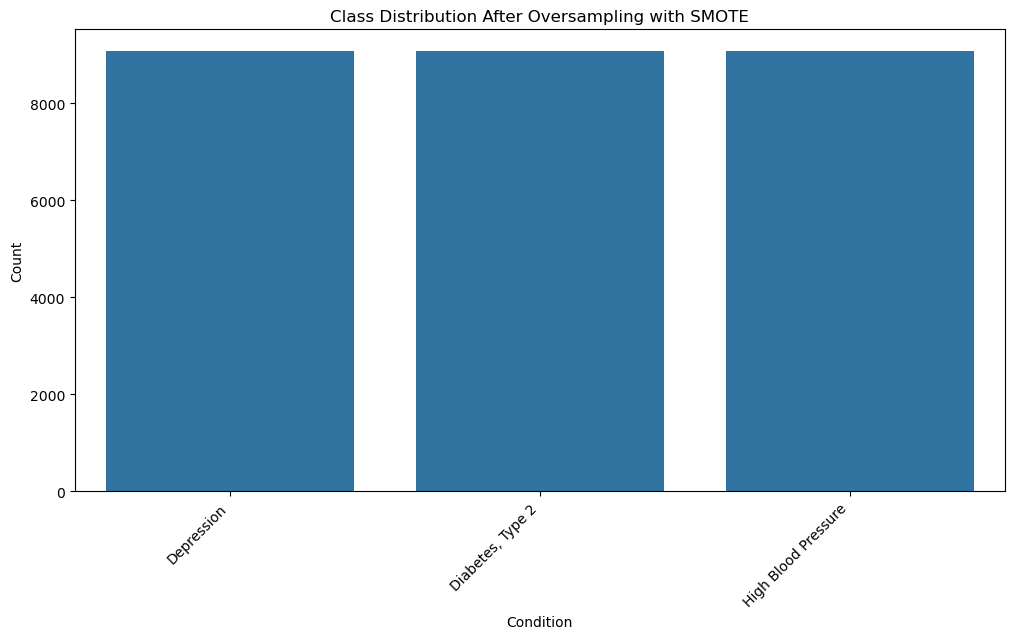

Class Distribution After Oversampling:
Depression             9069
Diabetes, Type 2       9069
High Blood Pressure    9069
Name: count, dtype: int64


In [33]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Class distribution before handling imbalance
class_counts = filtered_data['condition'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(x='condition', data=filtered_data, order=class_counts.index)
plt.title('Class Distribution Before Handling Imbalance')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

print(f"Class Distribution Before Handling Imbalance:\n{class_counts}")

# Preparing data for SMOTE
# 1. Select only numeric columns from features
X_numeric = filtered_data.select_dtypes(include=[np.number])

# 2. Encode the target variable 'condition'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(filtered_data['condition'])

# Apply SMOTE on the numeric features and encoded target
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y_encoded)

# Decode the resampled target variable back to the original labels
y_resampled_decoded = label_encoder.inverse_transform(y_resampled)

# Class distribution after oversampling
resampled_class_counts = pd.Series(y_resampled_decoded).value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(x=y_resampled_decoded, order=resampled_class_counts.index)
plt.title('Class Distribution After Oversampling with SMOTE')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

print(f"Class Distribution After Oversampling:\n{resampled_class_counts}")


<H1> STANDARDIZATION </H2>

In [34]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(tfidf_df)
SS_X = pd.DataFrame(SS_X)

SS_X.columns = list(SS_X)

SS_X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.054539,-0.073001,-0.067972,-0.029499,-0.039976,-0.027046,-0.048186,-0.059514,-0.033128,-0.043541,...,-0.028618,-0.041382,-0.03354,-0.046579,-0.029912,-0.028718,-0.028456,-0.037564,-0.030932,-0.027269
1,-0.054539,-0.073001,-0.067972,-0.029499,-0.039976,-0.027046,-0.048186,-0.059514,-0.033128,-0.043541,...,-0.028618,-0.041382,-0.03354,-0.046579,-0.029912,-0.028718,-0.028456,-0.037564,-0.030932,-0.027269
2,-0.054539,-0.073001,-0.067972,-0.029499,-0.039976,-0.027046,-0.048186,-0.059514,-0.033128,-0.043541,...,-0.028618,-0.041382,-0.03354,-0.046579,-0.029912,-0.028718,-0.028456,-0.037564,-0.030932,-0.027269
3,-0.054539,-0.073001,-0.067972,-0.029499,-0.039976,-0.027046,-0.048186,-0.059514,-0.033128,-0.043541,...,-0.028618,-0.041382,-0.03354,-0.046579,-0.029912,-0.028718,-0.028456,-0.037564,-0.030932,-0.027269
4,-0.054539,-0.073001,-0.067972,-0.029499,-0.039976,-0.027046,-0.048186,-0.059514,-0.033128,-0.043541,...,-0.028618,-0.041382,-0.03354,-0.046579,-0.029912,-0.028718,-0.028456,-0.037564,-0.030932,-0.027269


<H1> PERFORMING PCA TO THE STANDARDIZED DATA OBTAINED </H2>

In [35]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(SS_X)
pc=pd.DataFrame(pc)
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.096885,-1.858692,-0.104301,-0.911331,-1.252902,0.683589,2.789802,1.342629,-0.466618,-2.137041,...,-2.840122,-0.286298,-1.664161,-1.245393,0.719752,0.071870,0.005699,0.071580,-0.031918,-0.004994
1,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.014971,-0.001053,0.013403,0.023395,-0.006078,0.001029,0.005585,-0.004643,0.000069,0.001116
2,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.014971,-0.001053,0.013403,0.023395,-0.006078,0.001029,0.005585,-0.004643,0.000069,0.001116
3,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.014971,-0.001053,0.013403,0.023395,-0.006078,0.001029,0.005585,-0.004643,0.000069,0.001116
4,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.014971,-0.001053,0.013403,0.023395,-0.006078,0.001029,0.005585,-0.004643,0.000069,0.001116


<h1> For every variable inspecting the variance </h3>

In [36]:
for i in range(pc.shape[1]):  # Loop through all components
    variance = pc.iloc[:, i].var()
    print(f"Index {i}: Variance = {variance}")

Index 0: Variance = 1.542447583300865
Index 1: Variance = 1.2883013245258055
Index 2: Variance = 1.2638504367831682
Index 3: Variance = 1.1930381419956213
Index 4: Variance = 1.1855475217339426
Index 5: Variance = 1.1641061655151719
Index 6: Variance = 1.1537852728667763
Index 7: Variance = 1.150056149886006
Index 8: Variance = 1.1400753792709541
Index 9: Variance = 1.1376317577515414
Index 10: Variance = 1.1275985352219187
Index 11: Variance = 1.1167118609377817
Index 12: Variance = 1.1060886120447044
Index 13: Variance = 1.1011161755175933
Index 14: Variance = 1.0969250792039105
Index 15: Variance = 1.0938219265814113
Index 16: Variance = 1.091232198932725
Index 17: Variance = 1.0873217303455884
Index 18: Variance = 1.081272885607125
Index 19: Variance = 1.0802662484336163
Index 20: Variance = 1.0740281613135225
Index 21: Variance = 1.0730656142990858
Index 22: Variance = 1.0704644777925683
Index 23: Variance = 1.0618774835297715
Index 24: Variance = 1.0549660591611547
Index 25: Vari

<h1> considering the columns whose variance is >0 </h3>

In [37]:
X_new=pc.iloc[:,0:51]
X_new.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-1.096885,-1.858692,-0.104301,-0.911331,-1.252902,0.683589,2.789802,1.342629,-0.466618,-2.137041,...,3.528616,0.278978,1.422425,0.185984,0.090894,-0.096384,0.048061,3.818008e-11,-0.019544,-0.020626
1,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.004537,-0.001978,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.325670e-12,0.000686,0.000727
2,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.004537,-0.001978,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.324153e-12,0.000686,0.000727
3,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.004537,-0.001978,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.323610e-12,0.000686,0.000727
4,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,0.004537,-0.001978,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.323091e-12,0.000686,0.000727


In [38]:
filtered_data['rating'] = SS.fit_transform(filtered_data[['rating']])

<h1> LabelEncodind for categorical Columns </h3>

In [39]:
# Step 2: Encode DrugName columns
label_encoder_drugname = LabelEncoder()

filtered_data['drugname_encoded'] = label_encoder_drugname.fit_transform(filtered_data['drugName'])

In [40]:
# Step 3: Select the additional columns ('condition','rating','drug name') and normalize if necessary
X_new2= filtered_data[['drugname_encoded','rating']]
X_new2

,drugname_encoded,rating
11,173,0.978204
31,275,0.354558
44,313,-0.892735
50,89,0.978204
67,95,0.978204
...,...,...
161251,202,-0.892735
161258,55,-1.828204
161278,164,0.666381
161286,320,-1.516381


In [41]:
x=pd.concat([X_new,X_new2],axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,drugname_encoded,rating
0,-1.096885,-1.858692,-0.104301,-0.911331,-1.252902,0.683589,2.789802,1.342629,-0.466618,-2.137041,...,1.422425,0.185984,0.090894,-0.096384,0.048061,3.818008e-11,-0.019544,-0.020626,NaN,NaN
1,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.325670e-12,0.000686,0.000727,NaN,NaN
2,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.324153e-12,0.000686,0.000727,NaN,NaN
3,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.323610e-12,0.000686,0.000727,NaN,NaN
4,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.323091e-12,0.000686,0.000727,NaN,NaN


In [52]:
x

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,drugname_encoded,rating
0,-1.096885,-1.858692,-0.104301,-0.911331,-1.252902,0.683589,2.789802,1.342629,-0.466618,-2.137041,...,1.422425,0.185984,0.090894,-0.096384,0.048061,3.818008e-11,-0.019544,-0.020626,173,0.978204
1,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.325670e-12,0.000686,0.000727,275,0.354558
2,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.324153e-12,0.000686,0.000727,313,-0.892735
3,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.323610e-12,0.000686,0.000727,89,0.978204
4,-0.227315,-0.160292,-0.006955,-0.023476,-0.027816,-0.002137,-0.058133,-0.012795,-0.054530,-0.039261,...,-0.006796,-0.000927,-0.004154,-0.000106,-0.001695,-1.323091e-12,0.000686,0.000727,95,0.978204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,202,-0.892735
13940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,55,-1.828204
13941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,164,0.666381
13942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,320,-1.516381


In [ ]:
# Check for mismatched indexes
X_new = X_new.reset_index(drop=True)
X_new2 = X_new2.reset_index(drop=True)

# Concatenate
x = pd.concat([X_new, X_new2], axis=1)

# Verify nulls
print("Null values after concatenation:")
print(x.isnull().sum())

# Handle null values
x.fillna(0, inplace=True)  # Example: Filling with 0
# or
x.dropna(inplace=True)     # Example: Dropping rows with NaN

# Inspect the final result
print(x.head())

In [47]:
# Check for mismatched indexes
X_new = X_new.reset_index(drop=True)
X_new2 = X_new2.reset_index(drop=True)

In [48]:
# Concatenate
x = pd.concat([X_new, X_new2], axis=1)

In [49]:

# Verify nulls
print("Null values after concatenation:")
print(x.isnull().sum())

Null values after concatenation:
0                   595
1                   595
2                   595
3                   595
4                   595
5                   595
6                   595
7                   595
8                   595
9                   595
10                  595
11                  595
12                  595
13                  595
14                  595
15                  595
16                  595
17                  595
18                  595
19                  595
20                  595
21                  595
22                  595
23                  595
24                  595
25                  595
26                  595
27                  595
28                  595
29                  595
30                  595
31                  595
32                  595
33                  595
34                  595
35                  595
36                  595
37                  595
38                  595
39                  595
40     

In [50]:
# Handle null values
x.fillna(0, inplace=True)  # Example: Filling with 0
# or
x.dropna(inplace=True)     

In [51]:
# Inspect the final result
print(x.head())

          0         1         2         3         4         5         6  \
0 -1.096885 -1.858692 -0.104301 -0.911331 -1.252902  0.683589  2.789802   
1 -0.227315 -0.160292 -0.006955 -0.023476 -0.027816 -0.002137 -0.058133   
2 -0.227315 -0.160292 -0.006955 -0.023476 -0.027816 -0.002137 -0.058133   
3 -0.227315 -0.160292 -0.006955 -0.023476 -0.027816 -0.002137 -0.058133   
4 -0.227315 -0.160292 -0.006955 -0.023476 -0.027816 -0.002137 -0.058133   

          7         8         9  ...        43        44        45        46  \
0  1.342629 -0.466618 -2.137041  ...  1.422425  0.185984  0.090894 -0.096384   
1 -0.012795 -0.054530 -0.039261  ... -0.006796 -0.000927 -0.004154 -0.000106   
2 -0.012795 -0.054530 -0.039261  ... -0.006796 -0.000927 -0.004154 -0.000106   
3 -0.012795 -0.054530 -0.039261  ... -0.006796 -0.000927 -0.004154 -0.000106   
4 -0.012795 -0.054530 -0.039261  ... -0.006796 -0.000927 -0.004154 -0.000106   

         47            48        49        50  drugname_encoded    r

<h1> Data partition  </h3>

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled, 
                                                 test_size=0.3,random_state=10)

<h1>  Model Fitting  </h3>


In [53]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100,max_samples=0.5,max_features=0.6,random_state=42)
randomforest.fit(X_train,Y_train)
y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print("randomforest Training Accuracy:", train_accuracy)
print("randomforest Testing Accuracy:", test_accuracy)

randomforest Training Accuracy: 0.9966918714555766
randomforest Testing Accuracy: 0.9447507043978929


In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

# Predictions and accuracy
y_pred_train_logreg = logreg.predict(X_train)
y_pred_test_logreg = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy_logreg = accuracy_score(Y_train, y_pred_train_logreg)
test_accuracy_logreg = accuracy_score(Y_test, y_pred_test_logreg)

print("Logistic Regression Training Accuracy:", train_accuracy_logreg)
print("Logistic Regression Testing Accuracy:", test_accuracy_logreg)

Logistic Regression Training Accuracy: 0.42160260449485404
Logistic Regression Testing Accuracy: 0.4132059291926988


C:\Users\LOCHAN RISHITHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 <h1> Cross validation for Randomforest   </h3>

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
randomforest=RandomForestClassifier(n_estimators=50,max_samples=0.8,max_features=0.8,random_state=42)
training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled, test_size=0.3,random_state=i)
    randomforest.fit(X_train,Y_train)
    Y_pred_train = randomforest.predict(X_train)
    Y_pred_test  = randomforest.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.97


<h1> Evaluation </h2>

In [45]:
# Calculate accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(Y_test,Y_pred_test)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(Y_test,Y_pred_test,average='weighted')
recall = recall_score(Y_test,Y_pred_test, average='weighted')
f1 = f1_score(Y_test,Y_pred_test, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test,Y_pred_test))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2674
           1       0.98      0.97      0.97      2783
           2       0.97      0.96      0.96      2706

    accuracy                           0.97      8163
   macro avg       0.97      0.97      0.97      8163
weighted avg       0.97      0.97      0.97      8163

